<a href="https://colab.research.google.com/github/hrs9616/Misc.-scripts/blob/main/CN%2B_GRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style='font-size:large'>GRM Analysis for CN\+</span>



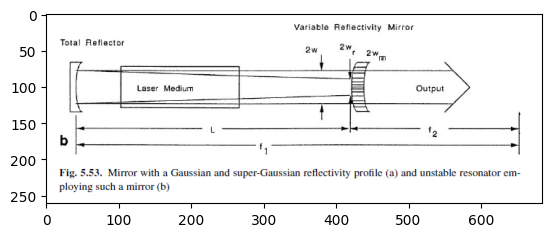

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageChops

# From Koechner, sec. 5.5
img1 = Image.open(r"/content/drive/MyDrive/GRMs/GRMs.png")
plt.imshow(img1)

In [35]:
# NdYAG properties

# index, 1% at.wt.
nYAG = 1.8197

# length of slab
l = 42                   # millimeters
s = 3.5

In [36]:
# CN+ resonator properties

# resonator length
L = 321.25               # millimeters

# HR ROC
R1 = 1400                # millimeters

In [37]:
# Custom GRM specs
R0 = 0.4
wM = 1.15                 # millimeters
N = 6
R2 = 1000                # millimeters

In [38]:
# GRM Eqns.

# Bean dia. at HR (need to measure, just a guess for now)
w = 1.75                  # estimated NF beam radius

# Magnification
m = np.sqrt(1 + (w / wM)**2)
print("m = ", m)

m =  1.8209036166410368


In [39]:
print(R1 + R2)
print(2*L)

2400
642.5


Comment:

2L  $\neq$ R1 \+ R2


To do:

- Determine beam size at porro and at HR



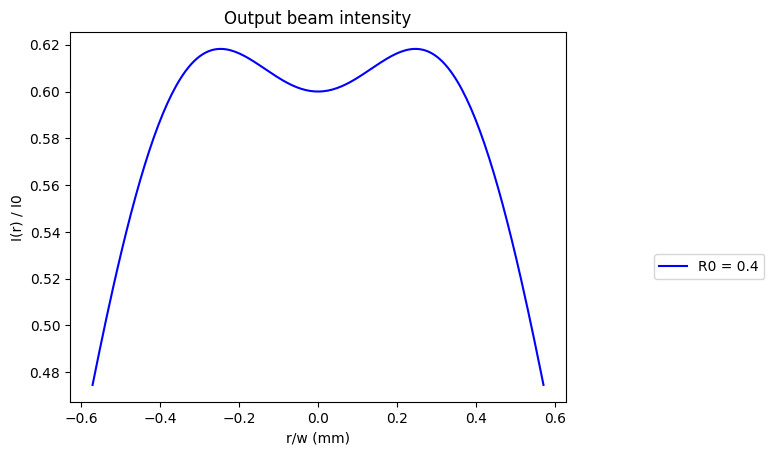

In [40]:
# Output intensity
I0 = 1
r = np.linspace(-1, 1, 200)
Iout = (1 - R0 * np.exp(-2*(r/wM)**2))  * I0 * np.exp(-2*(r/w)**2)

#plot beam intensity profile
plt.xlabel("r/w (mm)")
plt.ylabel("I(r) / I0")
#plt.grid()
plt.plot(r/w, Iout/I0, label='R0 = 0.4', color='blue', linestyle='-')
plt.title("Output beam intensity")
plt.legend(bbox_to_anchor=(1.4, 0.4), borderaxespad=0)
plt.show()